In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
from scipy.optimize import curve_fit

In [2]:
data=loadtxt('./Adatok/858Marcius_2_Mg_73.dat',comments='#')

In [3]:
indir='./Adatok/'

In [4]:
names=['858Marcius_2_Mg_73','859Marcius_2_Mg_73','860Marcius_2_Mg_45_','861Marcius_2_Mg_45_', \
      '862Marcius_2_Mg_27','863Marcius_2_Mg_27','864Marcius_2_Mg_125','865Marcius_2_Mg_125', \
      '866Marcius_2_Mg_093','867Marcius_2_Mg_093','868Marcius_2_Mg_047','869Marcius_2_Mg_047', \
      '870Marcius_2_Mg_145','871Marcius_2_Mg_145']

In [16]:
def simple_lin(x,a,b):
    return(a*x+b)

In [19]:
S=[]
Fm=[]
hm=[]
rel_err=[]
for f in names:
    data=loadtxt(indir+f+'.dat',comments='#')
    val, idx = max((val, idx) for (idx, val) in enumerate(data[:,1]))
    val2, idx2 = max((val2, idx2) for (idx2, val2) in enumerate(data[idx:idx+100,2]))
    z,pcov=curve_fit(simple_lin,data[idx+idx2:idx+idx2+50,2],data[idx+idx2:idx+idx2+50,1])
    S.append(z[0])
    Fm.append(val)
    hm.append(data[idx+idx2,2])
    rel_err.append(sqrt(diag(pcov)[0])/z[0])
    #plot(data[:,2],data[:,1],'bo',ms=0.5)
    #mm=linspace(4.2,4.6,10)
    #plot(mm,polyval(z,mm))
    #xlim(4.4,4.55)
    #ylim(100,300)

In [22]:
err=zeros((7))
for j in range (7):
    err[j]=(rel_err[2*j]+rel_err[2*j+1])/2
hc*err

array([0.05709932, 0.02918516, 0.52197417, 0.21256259, 0.25759492,
       0.14511758, 0.06217663])

In [6]:
S

[2889.8038111692463,
 1750.9700609029069,
 1482.5232385579486,
 1217.692008998262,
 9987.701728760723,
 1642.6488373156117,
 6064.570924400211,
 6415.324289832045,
 6299.402395259567,
 3538.360401089632,
 2488.6504452458908,
 1387.5753922351696,
 1806.52105489488,
 1675.6538792057813]

In [7]:
hc_t=zeros((14))
hc=zeros((7))
for i in range (14):
    hc_t[i]=hm[i]-0.75*Fm[i]/S[i]
for j in range (7):
    hc[j]=(hc_t[2*j]+hc_t[2*j+1])/2

In [8]:
hc

array([3.45059236, 3.48503894, 4.15363094, 5.52929115, 5.37350666,
       5.63103012, 4.58956005])

In [9]:
for j in range (7):
    print((S[2*j]+S[2*j+1])/2)

2320.386936036077
1350.1076237781053
5815.175283038167
6239.947607116128
4918.8813981746
1938.1129187405302
1741.0874670503308


In [10]:
for j in range (7):
    print((Fm[2*j]+Fm[2*j+1])/2)

299.2876025
299.63186099999996
299.2628585
299.6415895
299.697005
299.25645
299.138962


In [11]:
for j in range (7):
    print((hm[2*j]+hm[2*j+1])/2)

3.553495
3.6531055
4.233092
5.5653345000000005
5.423109999999999
5.7570615
4.7185935


In [14]:
A=24.5*hc**2

In [29]:
HV=zeros((7))
HV_err=zeros((7))
for j in range (7):
    HV_err[j]=((Fm[2*j]+Fm[2*j+1])/2/A[j]*err[j])
    HV[j]=((Fm[2*j]+Fm[2*j+1])/2/A[j])

In [30]:
conc=[0.073,0.045,0.027,0.0125,0.0093,0.0047,0.0145]

In [53]:
def func(x,a,b,c):
    return(a+b*x**c)

In [71]:
popt,pcov=curve_fit(func,conc,HV,p0=[10,3,0.5])

In [72]:
popt

array([-0.06243999,  3.21605618,  0.3929115 ])

In [83]:
sqrt(diag(pcov))

array([0.69224875, 1.48746038, 0.37955989])

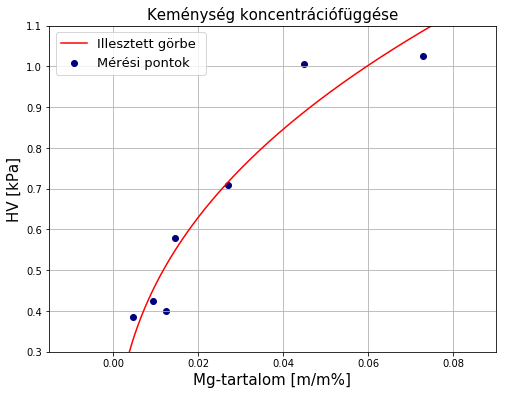

In [80]:
figsize(8,6)
scatter(conc,HV,color='navy',label='Mérési pontok')
mm=linspace(0,0.1,1000)
plot(mm, func(mm,*popt),color='red',label='Illesztett görbe ')
xlabel('Mg-tartalom [m/m%]',fontsize=15)
ylabel('HV [kPa]',fontsize=15)
xlim(-0.015,0.09)
ylim(0.3,1.1)
grid(True)
legend(fontsize=13)
title('Keménység koncentrációfüggése',fontsize=15)
savefig('./szabad.png',bbox_inches='tight')

In [84]:
def func1(x,a,b):
    return(a+b*x**(1/2))
def func2(x,a,b):
    return(a+b*x**(2/3))

[0.08925075 3.74068448]
[0.22841962 5.08073946]


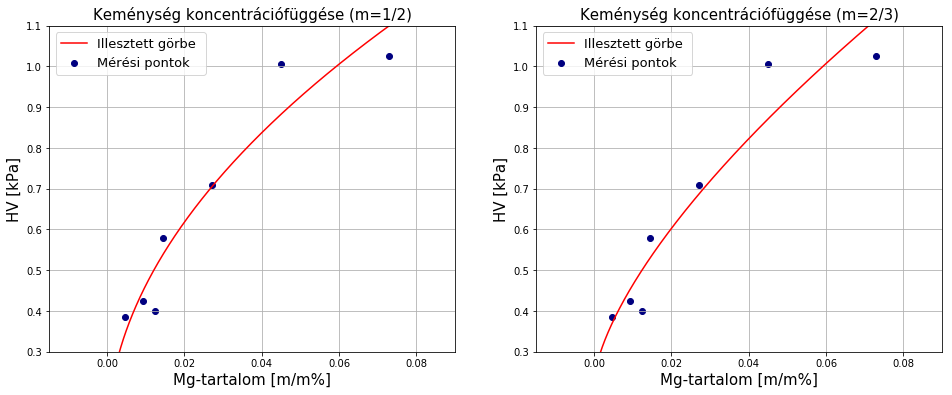

In [85]:
figsize(16,6)
fig, (ax1,ax2)=subplots(1,2)#sharex=True,sharey=True)
ax1.scatter(conc,HV,color='navy',label='Mérési pontok')
popt1,pcov1=curve_fit(func1,conc,HV)
print(popt1)
mm=linspace(0,0.1,1000)
ax1.plot(mm, func1(mm,*popt1),color='red',label='Illesztett görbe ')
ax1.set_xlabel('Mg-tartalom [m/m%]',fontsize=15)
ax1.set_ylabel('HV [kPa]',fontsize=15)
ax1.set_xlim(-0.015,0.09)
ax1.set_ylim(0.3,1.1)
ax1.grid(True)
ax1.legend(fontsize=13)
ax1.set_title('Keménység koncentrációfüggése (m=1/2)',fontsize=15)

ax2.scatter(conc,HV,color='navy',label='Mérési pontok')
popt2,pcov2=curve_fit(func2,conc,HV)
print(popt2)
mm=linspace(0,0.1,1000)
ax2.plot(mm, func2(mm,*popt2),color='red',label='Illesztett görbe ')
ax2.set_xlabel('Mg-tartalom [m/m%]',fontsize=15)
ax2.set_ylabel('HV [kPa]',fontsize=15)
ax2.set_xlim(-0.015,0.09)
ax2.set_ylim(0.3,1.1)
ax2.grid(True)
ax2.legend(fontsize=13)
ax2.set_title('Keménység koncentrációfüggése (m=2/3)',fontsize=15)

savefig('./illesztes.png',bbox_inches='tight')

In [86]:
sqrt(diag(pcov1))

array([0.07973915, 0.48917486])

In [87]:
sqrt(diag(pcov2))

array([0.06769247, 0.70908118])